In [28]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as C
import pandas as pd

In [29]:
def mach(P, Po, k):
    a = (k-1)/k
    return np.sqrt((2/(k-1))*((Po/P)**a - 1))

def RatArea(M1, M2, k):
    a=(k+1)/(2*(k-1))
    b=(k-1)/2
    return (M2/M1)*(((1+b*(M1**2))/(1+b*(M2**2)))**a)

def A1A2(Po,P,k):
    a = (k-1)/k
    b = (((k+1)/2)**(1/(k-1)))*((P/Po)**(1/k))
    c = np.sqrt((k+1)/(k-1)*(1-(P/Po)**a))
    return b*c

def Cf_(Pe, P0, Pa, At, Ae, k):
    a = (k+1)/(k-1)
    return np.sqrt((2*k**2/(k-1)*(2/(k+1))**a)*(1-(Pe/P0)**((k-1)/k))) + (Pe - Pa)*Ae/(P0*At)

def thrust(Cf,At,P0):
    return At*P0*Cf*6894.757*10**(-6)

def Isp_(k, Pe, Po, To, M):
    R=C.R
    a=(k-1)/k
    Isp=(1/C.g)*np.sqrt(((2*To*(R/(M*a))))*(1-(Pe/Po)**a))
    return Isp

def diametro(A):
    return np.sqrt((4*A)/C.pi)

def altura(m, mp, F, Isp, angulo):
    ay=(F/m)*np.sin(angulo)-C.g
    
    # Fase 1
    t1=(Isp)*mp*C.g/F
    h1=1/2*ay*t1**2
    if h1>3000 :
        print("La fase 1 pasa de 3000 metros")
    
    V_y1=ay*t1
    
    # Fase 2
    t2=V_y1/C.g

    h=(ay*t1**2/2)*(1+ay/C.g)
    return h

def masa_propelente(F, Isp, m, h,angulo):
    ay=(F/m)*np.sin(angulo)-C.g
    mp=(F/Isp)*np.sqrt(2*h/(C.g*ay)*(1/(C.g+ay)))
    return mp

def ex_vel(R, To, k):
    a = (k+1)/(k-1)
    c = np.sqrt(R*To/(k*(2/(k+1))**a))
    return c

def Ab_(Outer, Core, Ends, p):
    N, Do, do, Lo, = p

    t_web = (Do-do)/2
    x = np.linspace(0,t_web ,1000)
    D = Do-Outer*(2*x)
    d = do + Core*(2*x)
    L = Lo - Ends*(2*x)
    #print(t_web, x)

    if Outer == 1:
        A_o = N*np.pi*D*L
        #print(A_o)
    else :
        A_o = [0]
    if Core == 1:
        A_c = N*np.pi*d*L
        #print(A_c)
    else:
        A_c = [0]
    if Ends == 1:
        A_e = N*1/2*np.pi*(D**2-d**2)
        #print(A_e)
    else:
        A_e = [0]

    Ab_tot = A_o + A_c + A_e

    return [A_o[0], A_c[0], A_e[0], Ab_tot]

def Kn_(At, Ab):
    #A_o, A_c, A_e = Ab

    Kn = (Ab)/At
    Kno = min(Kn)
    Kn_prom = np.mean(Kn)
    Kn_max = max(Kn)


    return [Kno, Kn_prom, Kn_max]


def Kn_pol(Po):
      Kn_max =  32.954 + 44.108*(Po/145.038) -1.1025*(Po/145.038)**2  # De psi a Mpa
      return Kn_max

def presion(Kn, a, rho_t, n, k, R, To ):
    c = (k+1)/(k-1)
    Po = (Kn*a*rho_t/(np.sqrt(k/(R*To)*(2/(k+1))**c)))**(1/(1-n))
    return Po


def Ve(To, R, k, Pe, Po ):

    Ve = np.sqrt(2*To*R*(k/(k-1))*(1-(Pe/Po)**((k-1)/k)))
    return Ve
    
def mdot(At,Po, k, To, R):
    m = At*Po*np.sqrt((1/(R*To))*k*(2/(k+1))**((k+1)/(k-1)))
    return m

def tail_off(Pab,R, To, At, V0, c, t):
    Pc = Pab*np.exp(-R*To*At*t/(V0*c))
    return Pc

# Al Can V2 (KNSU) propelente

| Compuesto              | Fórmula Química | Porcentaje |
|------------------------|-----------------|------------|
| Nitrato de potasio     | \( KNO_3 \)     | 62%        |
| Aluminio               | \( Al \)        | 3%         |
| Silicone               | \( SiO_2 \)     | 3%         |
| Azucar de mesa                | \( C_6H_{12}O_6 \) | 32%     |



## Factores de eficiencia

In [30]:
alpha = 15*np.pi/180 # angulo de la divergencia de la tobera 

N_noz = 0.85 # # eficiencia de la tobera
N_com = 0.95 # eficiencia de combustion
N_div = 1/2*(1 + np.cos(alpha)) # factor de corrección por la divergencia
N_po = 0.95 # factor de corrección de la presion de la camara

rho_rat = 0.95


In [31]:
k = 1.141607     # relación de calores especifixos
M = 0.03573117   # kg/mol masa molecular de los gases 
To_T = 1820.426    # K temperatura de combustion teorica
rho_T = 1.8892   # g/cm^3 densidad teorica



To = To_T*N_com # Temperatura "real"
rho = rho_T*rho_rat    # g/cm^3 densidad medida

# Coeficiente y exponente obtenido por Richard Nakka para el propelente KNSU
n = 0.319
a =(8.260/1000)/(10**(6*n)) # Pa, m/s


# r = 275/6 # mm/s
print(C.R/M)

232.69494444206558


# Área de quemado

# Presión

In [32]:
P0 = 800 #psi presion de la camara objetivo
Pa = 14.69594878 # presion atmosferica
Pe = Pa #psi presion de salida de la tobera

## Condiciones del Cohete

In [33]:
m=60 # masa del cohete sin propelente

theta=np.pi/2 #angulo

# Mach
Mt=1
Me=mach(Pe,P0,k)
print(Me)

3.010761166043676


In [34]:
Dc=101.6 #mm Diametro de la camara 
Ac=C.pi*(Dc/2)**2 #mm**2 # área de la camara


AtAc_l=[1/5.5] #RatArea(Mt,Mc,k)
At_l=[Ac*AtAc_l[0]]

At = At_l[-1]
Dt=diametro(At)


AeAt = RatArea(Me, Mt, k)
Ae=At*AeAt

De=diametro(Ae)

# Calculos teoricos
Cf_t = Cf_(Pe,P0, Pa, At, Ae, k)
Isp_t = Isp_(k,Pe,P0,To,M)


Cf = Cf_t*N_noz
Isp = Isp_t*N_noz*N_com*N_div*N_po # s

F_thrust = thrust(Cf,At,P0)
Ve = ex_vel(C.R/M, To, k)*Cf # Velocidad de salida de los gases de la tobera
dm = F_thrust/Ve

mp0 = m*(np.exp(np.sqrt(2*C.g*3000)/Ve)-1) # masa minima
print(mp0, Ve, np.sqrt(2*C.g*3000))

11.774539288807713 1353.7351895427316 242.56937152080843


Este analisis para obtener la masa del propelente no incluye la fuerza de fricción, por lo que se necesita resolver numéricamente las ecuaciones de movimiento como se hace posteriormente.
Para poder obtener la masa total incluyendo el propelente se puede se puede resolver con una serie geometrica de la forma
$$
\frac{M}{m}=\Sigma_{n=0}^\infty (MR)^n=\frac{1}{1-MR} ,    |MR|<1
$$
Para poder obtener un MR razonable se puede hacer un promedio de la funcion de mp/m=MR de la forma
$$
 MR=\langle \frac{m_p}{m} \rangle=\frac{1}{I_{sp}}\sqrt{\frac{2hF}{gsen\theta}} \frac{1}{b-a}\int_a^b\frac{dm}{\sqrt{Fsen\theta-mg}} 
$$
O aun mejor se puede utilizar las iteraciónes para tener un resultado mas adecuado como se muestra a continuación.

In [35]:
# Con este codigo se pretende obtener un primer valor cercano para así poder obtener la masa que se necesita con el método de las ecs diferenciales.

# Integral de mp/m
from scipy import integrate
h=3000 # altura deseada
a_1, b_1 = 40, 60
c =(1/Isp)*np.sqrt(2*h*F_thrust/(np.sin(theta)*C.g))
K = lambda m: c*(1/np.sqrt(F_thrust*np.sin(theta)-C.g*m))   

MR=1/(b_1-a_1)*(integrate.quadrature(K, a_1, b_1)[0]) # relacion de masa del propelente y el cohete

# Método iterativo 
i = 0
m_p0 = [0]
M_tot0 = [m]
error=1
while error > 10**-6:
    
    m_p0.append(M_tot0[i]*K(M_tot0[i]))
    M_tot0.append(m+m_p0[i+1])
    error = M_tot0[i+1]-M_tot0[i]
    #print(error, M_tot[-1])
    i+=1

# Mtot = m*(1/(1-MR)) # masa total con calculo de promedio

# h1 = altura(Mtot ,Mtot-m, F, Isp, np.pi/2) #altura alcanzada
h2 = altura(M_tot0[-1] ,m_p0[-1], F_thrust, Isp, np.pi/2) # Altura con metodo iterativo
t = Isp*(M_tot0[-1]-m)*C.g/F_thrust # tiempo de empuje


print( t, M_tot0[-1], m_p0[-1], h2, Isp) # mm

1.7242946052939767 75.86747568949708 15.867475689497088 2999.99995010474 122.4608827376444


## Dimensiones de la tobera

In [36]:

ApAt=2
Dp = np.sqrt(ApAt)*Dt #Diametro del port

# Área de quemado
V0 = mp0*1000/rho # cm^3 Volumen con densidad experiemental del grano

Va0 = (V0)/(1-ApAt*At*4/(np.pi*Dc**2)) # cm^3

L0 = Va0*10**3/Ac # mm  Longitud del grano con densidad experimentale

p0 = [4, Dc-.6, Dp, L0/4] #  N, D, d, L, At, = p
Ab0 = Ab_(0,1,1, p0)

Kn_max= Kn_pol(P0)
Kn = Kn_(At, Ab0[-1])

At2 = max(Ab0[-1])/Kn_max






print(Dc,Dt,De, Ac, At, Ae, AeAt)
#print(Dc, Dt, De, Dp)
#print(diametro(At), diametro(At2), L0, Kn_max, Kn)

101.6 43.32238556346004 125.64924948918002 8107.319665559963 1474.0581210109024 12399.657207063969 8.41191879093637


# Determinantes del rendimiento

In [37]:


# Calculos con factores de eficiencia
Cf = Cf_t*N_noz
F = thrust(Cf,At,P0)
Isp = Isp_t*N_noz*N_com*N_div*N_po # s

Ve = ex_vel(C.R/M, To, k)*Cf # Velocidad de salida de los gases de la tobera
dm = F/Ve # flujo masico

print(Cf, F, Isp, dm, Ve, ex_vel(C.R/M, To, k))

1.359223498817372 11051.327097970014 122.4608827376444 8.163581166640842 1353.7351895427316 995.962173049969


918.7909390042106 822.4243055249157 1.3932448104699497


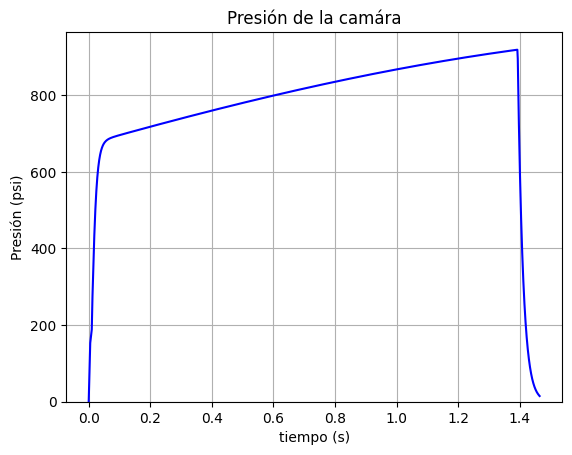

In [38]:
# Superficies de quemado
Bs = [0, 1, 1, 4]

Datos = 1000
t_web0 = np.array([(Dc-0.6-Dp)/2])
Xinc = np.linspace(0, t_web0[0]/(1+Bs[0]*Bs[1]), Datos)
t_web = np.append(t_web0, t_web0[0]-Xinc)

D = Dc-0.6 - Bs[0]*2*Xinc
d = Dp + Bs[1]*2*Xinc
L = L0 - Bs[2]*Bs[3]*2*Xinc

Vc = np.pi*(Dc/2)**2*L0/(1000**3) # m^3
V_G = 1/4*np.pi*(D**2-d**2)*L/(1000**3) # m^3
V_F = Vc - V_G

P_a = 0.101325

Po_abs1 = [] # En Pa
Po_abs2 = [P_a] # En Mpa
m_grain = rho*1000*V_G # kg
m_gen = [0]
m_noz = [0]
m_sto = [0]
mass_sto = [0]
rho_prod = []
t1 = [0]
a1 = 8.260
#r = lambda P: a1*P**n
R = [a1*(Po_abs2[0]**n)]

for i in range(len(Xinc)-1):
    rho_prod.append(mass_sto[i]/V_F[i])


    Po_abs1.append(rho_prod[i]*C.R/M*To+P_a*10**6)
    Po_abs2.append(Po_abs1[i]/(10**6))
    R.append(a1*(Po_abs2[i])**n)
    t1.append(Xinc[1]/R[i+1] + t1[i]) #2
    m_gen.append((m_grain[i]-m_grain[i+1])/(t1[i+1]-t1[i]))
    
    # print(mdot(At/(10**6),(Po_abs2[i+1]-P_a)*10**6, k,To,C.R/M), Po_abs2[i+1]-P_a, Po_abs1[i])
    if m_gen[i+1] < mdot(At/(10**6),(Po_abs2[i+1]-P_a)*10**6, k,To,C.R/M):
        if Po_abs2[i+1] > 0:
            m_noz.append( mdot(At/(10**6),(Po_abs2[i+1]-P_a)*10**6, k,To,C.R/M))
        else :
            m_noz.append(0)
    else :
        m_noz.append(mdot(At/(10**6),(Po_abs2[i+1]-P_a)*10**6, k,To,C.R/M))
    
    m_sto.append(m_gen[i+1]-m_noz[i+1])
    

    #print(m_sto, t1, mass_sto, i)
    if m_sto[i+1]*(t1[i+1]-t1[i]) + mass_sto[i] < 0 :
        mass_sto.append(0)
    else :
        mass_sto.append(m_sto[i+1]*(t1[i+1]-t1[i]) + mass_sto[i])

Vc = Va0*10**-6
A_t = At*10**-6
A_e = Ae*10**-6

Po_gage =  np.array(Po_abs2) - P_a
Po_max = max(Po_abs2) - P_a
Po_final = (0.02/100)*Po_max + P_a

t_final = -np.log(Po_final/(Po_abs1[-1]*10**-6))*((Vc)*ex_vel(C.R/M, To, k))/(C.R/M*To*(A_t))
t2 = np.linspace(t1[-1], t1[-1]+ t_final, 100)

t_thrust = np.append(np.array(t1), t2[1:])

A1 = (C.R/M)*To*(A_t)*(t2[1:]-t1[-1])
A2 = (Vc)*ex_vel(C.R/M, To, k)

Pc = np.array(Po_abs2[-1]*(np.exp(-A1/A2)))

Po_gage = np.array(Po_abs1)*10**-6 - P_a
Presion_camara = np.append(Po_gage, Pc)


print( Po_max*1000000/6895, np.mean(Po_abs2)*1000000/6895, t1[-1])


#print(Po_final, Po_abs1[-1]*10**-6,Pc[-1], t2[-1], (C.R/M)*To*(At/10**6)/A2, At, t2[1]-t2[0])
plt.plot(t_thrust[0:-1], Presion_camara*1000000/6895, 'b-')
plt.ylim(bottom=0)
plt.ylabel('Presión (psi)')
plt.xlabel('tiempo (s)')
plt.title('Presión de la camára')
plt.grid()
plt.show()


# print(Xinc[1], R[1], t1[-1], rho_prod[1], mass_sto[1], m_sto[1], m_noz[1],m_gen[1], m_grain[0], m_grain[1], Pc[-1], t2[0]==t1[-1], t2[1]-t2[0], t_final) # 1,1,1,0,0,0,1


In [39]:
print(len(Presion_camara), len(t_thrust))

1098 1099


13074.021011954528 10612.922375981052 15933.027198458323 Isp = 137.98557852305944


C:\Users\leo_1\AppData\Local\Temp\ipykernel_25012\2217227967.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt((2*k**2/(k-1)*(2/(k+1))**a)*(1-(Pe/P0)**((k-1)/k))) + (Pe - Pa)*Ae/(P0*At)
C:\Users\leo_1\AppData\Local\Temp\ipykernel_25012\2217227967.py:18: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((2*k**2/(k-1)*(2/(k+1))**a)*(1-(Pe/P0)**((k-1)/k))) + (Pe - Pa)*Ae/(P0*At)
C:\Users\leo_1\AppData\Local\Temp\ipykernel_25012\2217227967.py:18: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt((2*k**2/(k-1)*(2/(k+1))**a)*(1-(Pe/P0)**((k-1)/k))) + (Pe - Pa)*Ae/(P0*At)


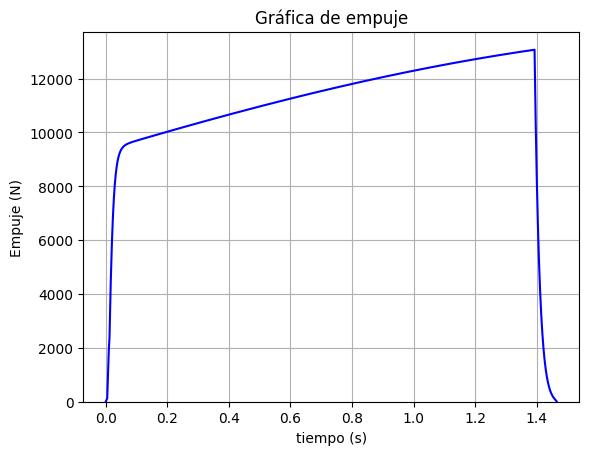

In [40]:
F = [0]
C_f = [N_noz]
P_e =[]
Ae_At = [1]
I_t = [0]
abc = np.append(np.array(Po_abs1)*10**-6, Pc)
Po_thrust = np.append(abc, 0)
P = lambda Po: Po*(1+(k-1)/2*Me**2)**(-k/(k-1))
for i in range(len(t_thrust)-1):

    if P(Po_thrust[i]*10**6) < P_a*10**6:
        P_e.append(P_a*10**6)
    else :
        P_e.append(P(Po_thrust[i]*10**6))
    
    C_f.append(N_noz*Cf_(P_e[i], Po_thrust[i+1]*10**6, P_a*10**6, A_t, A_e, k))

    F.append(C_f[i]*Po_thrust[i]*10**6*A_t)

    I_t.append((F[i+1] + F[i])/2*(t_thrust[i+1]-t_thrust[i]))
#print(Po_thrust)
#print(C_f) # hay un problema con el inicio de la gráfica
print(max(F), np.mean(F), sum(I_t), f'Isp = {sum(I_t)/(C.g*mp0)}')
plt.plot(t_thrust, F, 'b-')
plt.ylim(bottom=0)
plt.ylabel('Empuje (N)')
plt.xlabel('tiempo (s)')
plt.title('Gráfica de empuje')
plt.grid()
plt.show()





(1099,)


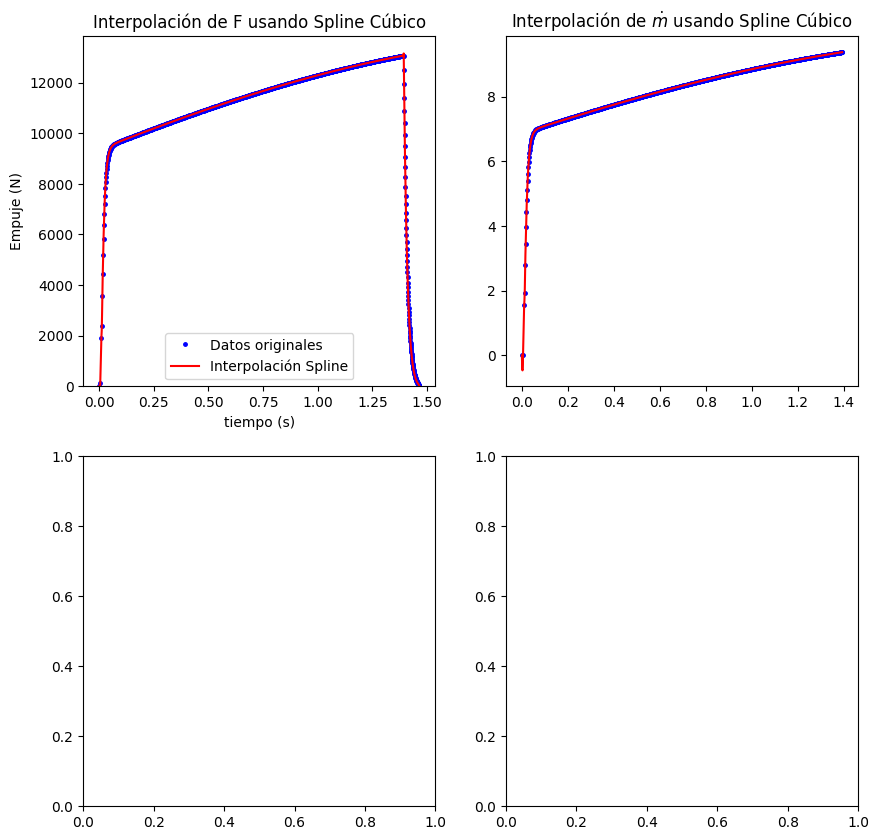

In [41]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Asumiendo que t_thrust y F ya están definidos:
# t_thrust = [...]
# F = [...]

#print(np.squeeze(t1))
print(np.shape(np.squeeze(t_thrust)))
# Crear una función spline para F en función del tiempo t_thrust
F_spline = CubicSpline(t_thrust, F)
m_noz_spline = CubicSpline(t1, m_noz)

t1_new = np.linspace(t1[0], t1[-1], 1000)
m_noz_new = m_noz_spline(t1_new)


# Opcional: Graficar para verificar la interpolación
t_new = np.linspace(min(t_thrust), max(t_thrust), 1000)
F_new = F_spline(t_new)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0,0].plot(t_thrust, F, 'bo', markersize='2.5', label='Datos originales')
ax[0,0].plot(t_new, F_new, 'r-', label='Interpolación Spline')
ax[0,0].legend()
ax[0,0].set_xlabel('tiempo (s)')
ax[0,0].set_ylabel('Empuje (N)')
ax[0,0].set_title('Interpolación de F usando Spline Cúbico')
ax[0,0].set_ylim(bottom=0)

ax[0,1].plot(t1, m_noz, 'bo', markersize='2.5', label='Datos originales' )
ax[0,1].plot(t1_new, m_noz_new, 'r-')
ax[0,1].set_title(r'Interpolación de $\dot{m}$ usando Spline Cúbico')

plt.show()


# Trayectoria y altura

01-10-2023: Aún se tiene que checar como es que cambia la masa durante el vuelo de la fase 1, para mejorar la masa que se necesita de propelente

In [42]:
# 01-10-2023: Aún se tiene que checar como es que cambia la masa durante el vuelo de la fase 1, para mejorar la masa que se necesita de propelente

from scipy.integrate import odeint

# Variación de la densidad del aire segun la altura.
def densidad_aire(h):
    # Definición de constantes
    rho_0 = 1.225  # kg/m^3
    g = C.g  # m/s^2
    M = 0.02897  # kg/mol
    R = 8.3144598  # J/mol·K
    T0 = 288.15  # K

    rho = rho_0 * np.exp(-g * M * h / (R * T0))
    return rho

def F(t, t_thrust):
    return np.piecewise(t, [t < t_thrust, t >= t_thrust], [F_spline(t), 0])

def dm(t, t_b):
    return np.piecewise(t, [t < t_b, t >= t_b], [m_noz_spline(t), 0])



# Sistema de ecuaciones
def sis(CI, t, p):
    m, Cd, A, t_thrust, t_b, theta, fase = p
    x, u, y, v = CI

    F_t = F(t, t_thrust)
    dm_t = dm(t, t_b)
    
    dxdt = u
    dudt = (1/(m-fase*(dm_t)*t))*(F_t - 0.5*densidad_aire(y)*A*Cd*(u**2 + v**2))*np.cos(theta)

    dydt = v
    dvdt = (1/(m-fase*(dm_t)*t))*(F_t - 0.5*densidad_aire(y)*A*Cd*(u**2 + v**2))*np.sin(theta) - C.g
    
    return [dxdt, dudt, dydt, dvdt]


# Parámetros
# p = [m, Cd, A, t_thrust, t_b, theta, fase]






h0 = 3000 # altura deseada 

Cd = 0.333 # coeficiente de arrastre
A = np.pi*(6/(2*39.37))**2 # área transversal (6 inch esn el diametro del tubo de fuselaje)


# Ciclo iterativo
i=0
m_p = [mp0] # se utiliza la formula del método que no se considera la fuerza de arrastre para la primera iteración
M_tot = [m + mp0]
h = [0]
while h[i] < h0:

    t_thr = t_thrust[-1] # tiempo de empuje

    # Calculos fase 1
    CI1 = [0, 0, 0, 0] # Condiciones iniciales x0, Vx0, y0, Vy0
    t1 = np.linspace(0, t_thr, 1000)
    p1 = [M_tot[i], Cd , A, t_thr, t1[-1], theta, 1]
    Sol_1 = odeint(sis, CI1, t1, args=(p1, ))

    # Calculos fase 2
    

    CI2 = [Sol_1[-1,0], Sol_1[-1,1], Sol_1[-1,2], Sol_1[-1,3]] # Condiciones iniciales
    t2 = np.linspace(t_thr,  50, 1000) # Si en la gráfica no se ve todo el descenso cambiar el tiempo final
    p2 = [m, Cd , A, t_thr, t1[-1], theta, 0]
    Sol_2 = odeint(sis, CI2, t2, args=(p2, ))
    

    h.append(max(Sol_2[:,2]))

    if h[i+1] < h0:
        M_tot.append(M_tot[i] + 0.005)
        m_p.append(M_tot[i+1]-m)

    #print(M_tot[i], h2[-1])
    print(h[i])
    i+=1
    

Fd_max = 1/2*(p1[1]*p1[2]*densidad_aire(Sol_1[-1, 2])*(Sol_1[-1,3]**2+Sol_1[-1,1]**2)) # Fuerza de arrastre maxima
fig, (ax1, ax2) = plt.subplots(2, figsize=(7, 7))


#print(tf, F, Sol_1[-1,0], Sol_1[-1,1])
# Primera fase
ax1.plot(t1, Sol_1[:, 2], 'r-') # posición en y 
#ax1.plot(t1, Sol_1[:, 3], 'g-') # velocidad en y
ax2.plot(t1, Sol_1[:, 0], 'r-') # posición en x
#ax2.plot(t1, Sol_1[:, 1], 'g-') # velocidad en x

# Segunda fase
ax1.plot(t2,Sol_2[:, 2], 'b-') # posición en y
#ax1.plot(t2, Sol_2[:, 3], 'm-') # velocidad en y
ax2.plot(t2, Sol_2[:, 0], 'b-') # posición en x
#ax2.plot(t2, Sol_2[:, 1], 'm-') # velocidad en x


ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('y [m]')
ax1.set_ylim(bottom=0)

ax2.set_xlabel('Tiempo [s]')
ax2.set_ylabel('x [m]')

# se tiene que arreglar las gráficas, porque la parte del decenso es diferente ya que esta es con paracaidas.

It = Isp*C.g*m_p[-1]

 # el extra de 3.45 es para que se cumpla que al tiempo tf la masa total sea igual a la masa sin propelente solo que  se tiene que 
#justificar de alguna otra manera, si se agragamos ese extra a las ecuaciones diferenciales, nos quita 400 gramos de la masa del propelente.

print(t_thr, max(h), m_p[-1], Fd_max, It, F_thrust/m) 

plt.tight_layout()
plt.show()



0
2505.797411144062
2505.446037313687
2505.09509300689
2504.7436638213276
2504.3927115013757
2504.041323468856
2503.6913606694025
2503.3393345628538
2502.9895363732603
2502.6379310487314
2502.28685611348
2501.936151808264
2501.5850271706704
2501.2339092600755
2500.8843067229277
2500.5344591212975
2500.1829117543944
2499.8330818958552
2499.482336355465
2499.1321375730117
2498.781745806508
2498.436813154061
2498.081277002954
2497.7307271778245
2497.380425888522
2497.0304606447194
2496.6815201477057
2496.3312156021602
2495.9814319658635
2495.6317562955096
2495.2825650318146
2494.9335845668475
2494.584724297302
2494.2354611624464
2493.88660091469
2493.5380705100156
2493.1888814274885
2492.8398081878186
2492.4972676828593
2492.1427751625706
2491.7935326462125
2491.445211361589
2491.097319832548
2490.74864946934
2490.4003920473847
2490.0518320163355
2489.7029771188954
2489.3549810124937
2489.0067970600603
2488.6583636924356
2488.3102577359855
2487.9608587793086
2487.614459483445
2487.2661318

KeyboardInterrupt: 

1.6794214306329776 3001.078407200419 15.45453928880437 232.52657533032968 18559.835565265792 61.744446126835975 184.1887849661669


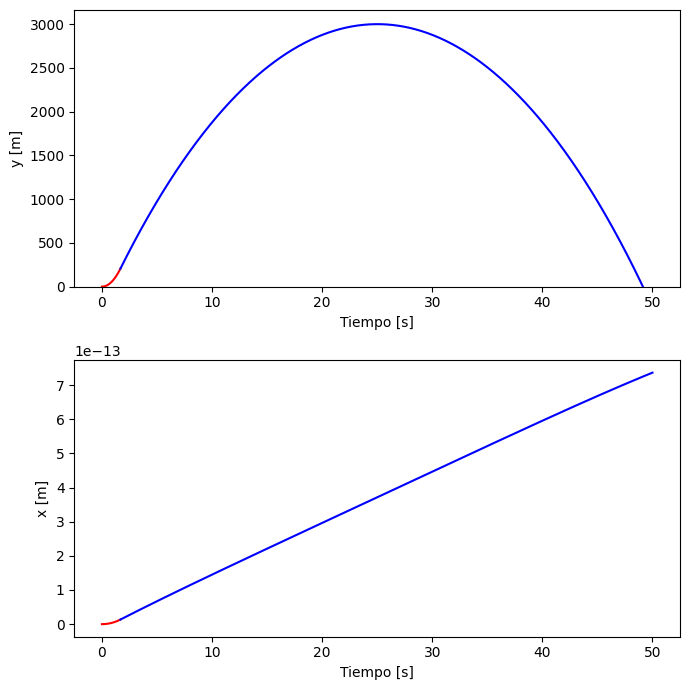

In [ ]:
# 01-10-2023: Aún se tiene que checar como es que cambia la masa durante el vuelo de la fase 1, para mejorar la masa que se necesita de propelente

from scipy.integrate import odeint

# Variación de la densidad del aire segun la altura.
def densidad_aire(h):
    # Definición de constantes
    rho_0 = 1.225  # kg/m^3
    g = C.g  # m/s^2
    M = 0.02897  # kg/mol
    R = 8.3144598  # J/mol·K
    T0 = 288.15  # K

    rho = rho_0 * np.exp(-g * M * h / (R * T0))
    return rho

# Sistema de ecuaciones
def f(CI, t, p):
    m, Cd, A, F, theta, fase = p
    x, u, y, v, = CI

    dxdt = u
    dudt =  (1/(m-fase*(dm)*t))*(fase*F - 1/2*densidad_aire(y)*A*Cd*(u**2 + v**2))*np.cos(theta)

    dydt = v
    dvdt =  (1/(m-fase*(dm)*t))*(fase*F - 1/2*densidad_aire(y)*A*Cd*(u**2 + v**2)*np.sin(theta)) - C.g
    return [dxdt, dudt, dydt, dvdt]

h0 = 3000 # altura deseada 

Cd = 0.333 # coeficiente de arrastre
A = np.pi*(6/(2*39.37))**2 # área transversal (6 inch esn el diametro del tubo de fuselaje)

# Ciclo iterativo
i=0
m_p = [mp0] # se utiliza la formula del método que no se considera la fuerza de arrastre para la primera iteración
M_tot = [m + mp0]
h = [0]
while h[i] < h0:

    tf = Isp*(M_tot[-1]-m)*C.g/F_thrust

    # Calculos fase 1
    CI1 = [0, 0, 0, 0] # Condiciones iniciales x0, Vx0, y0, Vy0
    t1 = np.linspace(0, tf, 1000)
    p1 = [M_tot[i], Cd , A, F_thrust, theta, 1]
    Sol_1 = odeint(f, CI1, t1, args=(p1, ))

    # Calculos fase 2
    

    CI2 = [Sol_1[-1,0], Sol_1[-1,1], Sol_1[-1,2], Sol_1[-1,3]] # Condiciones iniciales
    t2 = np.linspace(tf,  50, 1000) # Si en la gráfica no se ve todo el descenso cambiar el tiempo final
    p2 = [m, Cd , A, 0, theta, 0]
    Sol_2 = odeint(f, CI2, t2, args=(p2, ))
    

    h.append(max(Sol_2[:,2]))

    if h[i+1] < h0:
        M_tot.append(M_tot[i] + 0.005)
        m_p.append(M_tot[i+1]-m)

    #print(M_tot[i], h2[-1])

    i+=1

Fd_max = 1/2*(p1[1]*p1[2]*densidad_aire(Sol_1[-1, 2])*(Sol_1[-1,3]**2+Sol_1[-1,1]**2)) # Fuerza de arrastre maxima
fig, (ax1, ax2) = plt.subplots(2, figsize=(7, 7))


#print(tf, F, Sol_1[-1,0], Sol_1[-1,1])
# Primera fase
ax1.plot(t1, Sol_1[:, 2], 'r-') # posición en y 
#ax1.plot(t1, Sol_1[:, 3], 'g-') # velocidad en y
ax2.plot(t1, Sol_1[:, 0], 'r-') # posición en x
#ax2.plot(t1, Sol_1[:, 1], 'g-') # velocidad en x

# Segunda fase
ax1.plot(t2,Sol_2[:, 2], 'b-') # posición en y
#ax1.plot(t2, Sol_2[:, 3], 'm-') # velocidad en y
ax2.plot(t2, Sol_2[:, 0], 'b-') # posición en x
#ax2.plot(t2, Sol_2[:, 1], 'm-') # velocidad en x


ax1.set_xlabel('Tiempo [s]')
ax1.set_ylabel('y [m]')
ax1.set_ylim(bottom=0)

ax2.set_xlabel('Tiempo [s]')
ax2.set_ylabel('x [m]')

# se tiene que arreglar las gráficas, porque la parte del decenso es diferente ya que esta es con paracaidas.

It = Isp*C.g*m_p[-1]

L3 = M_tot[-1]-(dm)*tf # el extra de 3.45 es para que se cumpla que al tiempo tf la masa total sea igual a la masa sin propelente solo que  se tiene que 
#justificar de alguna otra manera, si se agragamos ese extra a las ecuaciones diferenciales, nos quita 400 gramos de la masa del propelente.

print(tf, max(h), m_p[-1], Fd_max, It, L3, F_thrust/m) 

plt.tight_layout()
plt.show()


In [ ]:
# Nueva manera de como obtener la masa del propelente aproximada, se necesita mas información pero realmente es un valor cercano a lo que se puede esperar
# con mi método

v1 = 1.2*np.sqrt(2*C.g*3000)
m1 = m*(np.exp(v1/(Isp*C.g))-1) 
print(m1)

16.456800582610498


## Volumen propelente
Para obetner un buen flujo de los gases de la camara con una relación $L/D=6$
$$
\frac{A_p}{A_t}=\frac{\pi D^2(1-V_1)}{4A_t}
$$
Donde D es el diametro del propelente y V1 es la relación de propelente y volumen de la camara
$$
V_1=\frac{V_p}{V_a}
$$
Donde $V_p$ es el volumen del propelente y $V_a$ es el volumen valido de la camara. Despejando para $V_a$
$$
V_a=\frac{V_p}{1-\frac{A_p}{A_t}A_t\frac{4}{\pi D^2}}
$$

In [ ]:
# Longitud de la camara 

V = m_p[-1]*1000/rho # cm^3 Volumen con densidad experiemental
V_t = m_p[-1]*1000/rho_T # cm^3 Volumen con densidad teorica
L = V_t*1000/Ac # mm  Longitud del grano solido sin huecos
# print(MR, K(50), Mtot, h1)

ApAt=1.9


Dp = np.sqrt(ApAt)*Dt #Diametro del port

Va1 = (V)/(1-ApAt*At*4/(np.pi*Dc**2)) # cm^3
L = Va1*10**3/Ac # mm  Longitud del grano con densidad experimentale

Va2 = (V_t)/(1-ApAt*At*4/(np.pi*Dc**2)) # cm^3
L_t = Va2*10**3/Ac # mm L_t=L_g

# L_g= V_t*10**3/(Ac-ApAt*At) ## mm longitud del grano con densidad teorica
Wf = (Dc-Dp)/Dc

print(Wf, V/Va1,L, L/Dc , L_t, L_t/Dc, Dp, Dt)

0.41224618635474136 0.6545454545454545 1416.9671795828547 13.946527358098963 1346.1188206037118 13.249200990194014 59.71578746635827 43.32238556346004


In [ ]:

p = [4, Dc-.6, Dp, L/4] #  N, D, d, L, At, = p
Ab = Ab_(0,1,1, p)

Kn = Kn_(At, Ab[3])

Kn_max = Kn_pol(P0)

At2 = max(Ab[3])/Kn_max

At_l.append(At2)
AtAc_l.append(At2/Ac)

P_0 = presion(Kn_max, a, rho*1000, n, k, C.R/M, To*N_com)/6895.76 # psi

AeAt2 = RatArea(mach(Pe,P_0,k), 1, k)

print(Kn, P_0, Kn_max, diametro(At2), diametro(AeAt2*At), diametro(At_l[-1]))

[208.61859158397212, 242.67056068034918, 269.4648412829856] 909.9336390735468 242.7022594294697 45.64849961185772 132.13069167538416 45.64849961185772


In [ ]:
print(8.260*0.10128398**n)

3.9787582246731867


## Datos obtenidos
Aquí se muestra en una tabla todos los datos importantes que se calcularon para la misión relacionados con motor (Por completar)